In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [6]:
from pmdarima import auto_arima

In [7]:
#Monthy avg. of CO2 level in a part of Hawaii
df1 = pd.read_csv('Data/co2_mm_mlo.csv')

In [8]:
df1.head()

,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,NaN,317.10
4,1958,7,1958.542,315.86,315.86


In [10]:
df1['date'] = pd.to_datetime({'year':df1['year'],'month':df1['month'],'day':1})

In [11]:
df1.head()

,year,month,decimal_date,average,interpolated,date
0,1958,3,1958.208,315.71,315.71,1958-03-01
1,1958,4,1958.292,317.45,317.45,1958-04-01
2,1958,5,1958.375,317.50,317.50,1958-05-01
3,1958,6,1958.458,NaN,317.10,1958-06-01
4,1958,7,1958.542,315.86,315.86,1958-07-01


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 6 columns):
year            729 non-null int64
month           729 non-null int64
decimal_date    729 non-null float64
average         722 non-null float64
interpolated    729 non-null float64
date            729 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 34.2 KB


In [14]:
df1 = df1.set_index('date')

In [15]:
df1.head()

,year,month,decimal_date,average,interpolated
date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50
1958-06-01,1958,6,1958.458,NaN,317.10
1958-07-01,1958,7,1958.542,315.86,315.86


In [16]:
df1 = df1.asfreq('MS')

In [17]:
df1.head()

,year,month,decimal_date,average,interpolated
date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50
1958-06-01,1958,6,1958.458,NaN,317.10
1958-07-01,1958,7,1958.542,315.86,315.86


In [18]:
df1.isnull().mean()

year            0.000000
month           0.000000
decimal_date    0.000000
average         0.009602
interpolated    0.000000
dtype: float64

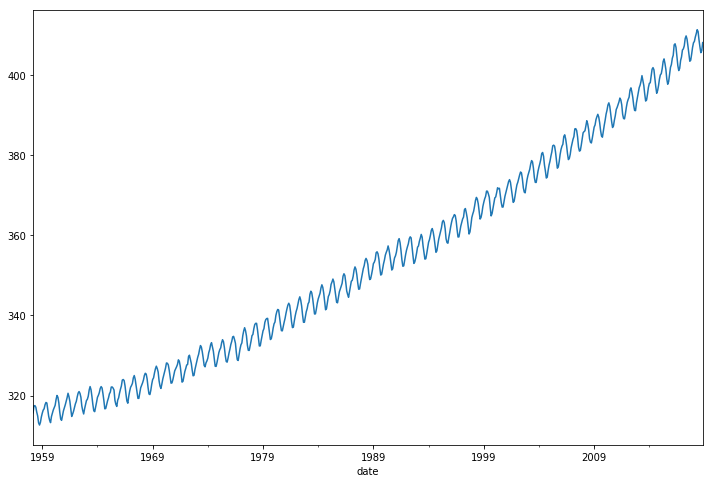

In [19]:
df1['interpolated'].plot(figsize=(12,8))

In [20]:
results_df1_ETS = seasonal_decompose(df1['interpolated'],model='add')

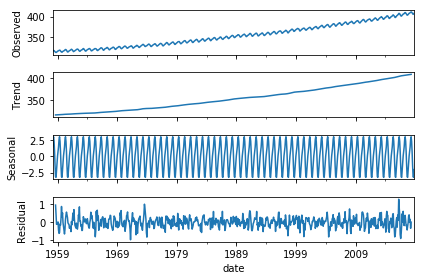

In [25]:
results_df1_ETS.plot();

In [27]:
auto_arima(df1['interpolated'],seasonal=True,m=12).summary()

C:\Users\imroy\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\imroy\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\imroy\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\imroy\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\imroy\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  729
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -209.374
Date:                            Mon, 12 Aug 2019   AIC                            428.748
Time:                                    01:49:52   BIC                            451.700
Sample:                                         0   HQIC                           437.604
                                            - 729                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.627e-05      0.000      0.316      0.752      -0.000       0.000
ma.L1         -0.3808      0.034    -11.128      0.000      -0.448      -0.314
ar.S.L12       0.9997      0.000   3327.065      0.000       0.999       1.000
ma.S.L12      -0.8662      0.021    -40.396      0.000      -0.908      -0.824
sigma2         0.0964      0.005     20.334      0.000       0.087       0.106
===================================================================================
Ljung-Box (Q):                       51.32   Jarque-Bera (JB):                 3.93
Prob(Q):                              0.11   Prob(JB):                         0.14
Heteroskedasticity (H):               1.13   Skew:                            -0.04
Prob(H) (two-sided):                  0.36   Kurtosis:                         3.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
train_df1 = df1.iloc[:717]
test_df1 = df1.iloc[717:]

In [29]:
model_df1 = SARIMAX(train_df1['interpolated'],order=(0,1,1),seasonal_order=(1, 0, 1, 12))

In [30]:
results_df1 = model_df1.fit()

In [31]:
results_df1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                       interpolated   No. Observations:                  717
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -205.152
Date:                            Mon, 12 Aug 2019   AIC                            418.305
Time:                                    01:59:07   BIC                            436.599
Sample:                                03-01-1958   HQIC                           425.369
                                     - 11-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3734      0.034    -10.955      0.000      -0.440      -0.307
ar.S.L12       0.9997      0.000   3173.650      0.000       0.999       1.000
ma.S.L12      -0.8647      0.023    -37.559      0.000      -0.910      -0.820
sigma2         0.0963      0.005     20.193      0.000       0.087       0.106
===================================================================================
Ljung-Box (Q):                       52.09   Jarque-Bera (JB):                 3.81
Prob(Q):                              0.10   Prob(JB):                         0.15
Heteroskedasticity (H):               1.13   Skew:                            -0.03
Prob(H) (two-sided):                  0.36   Kurtosis:                         3.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
start = len(train_df1)
end =  len(train_df1) + len(test_df1) - 1

In [33]:
predictions_df1 = results_df1.predict(start=start,end=end,typ='levels').rename('SARIMA Predictions')

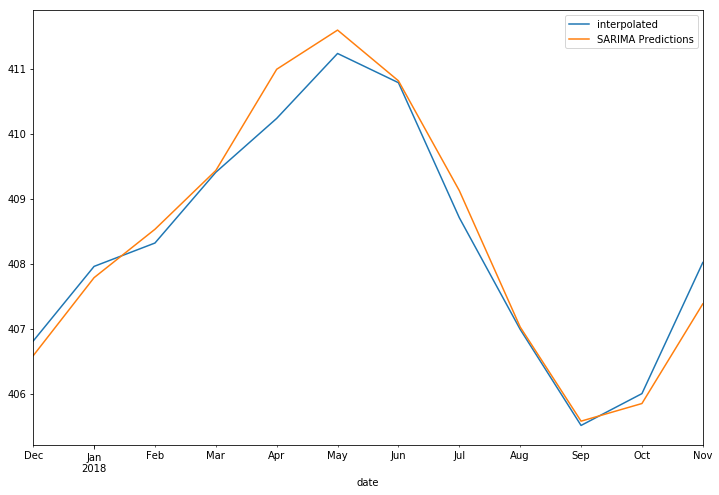

In [36]:
test_df1['interpolated'].plot(legend=True,figsize=(12,8))
predictions_df1.plot(legend=True)

In [37]:
#Model evaluation
from statsmodels.tools.eval_measures import rmse

In [39]:
error_df1 = rmse(test_df1['interpolated'],predictions_df1)

In [40]:
error_df1

0.3463183340256417

In [44]:
test_df1['interpolated'].mean()

408.3333333333333

# Forecast to the future


In [45]:
model_df1_forecast = SARIMAX(df1['interpolated'],order=(0,1,1),seasonal_order=(1, 0, 1, 12))
results_df1_forecast = model_df1_forecast.fit()

In [46]:
forecast_df1 = results_df1_forecast.predict(len(df1),len(df1)+11,typ='levels').rename('SARIMA FORECAST')

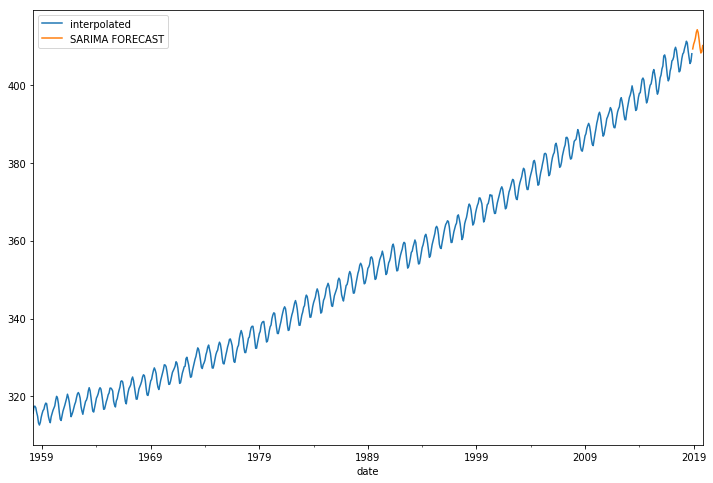

In [50]:
df1['interpolated'].plot(legend=True,figsize=(12,8))
forecast_df1.plot(legend=True)
